# Text Classification Using RNN

A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes form a directed graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior.

**Data:** "Movie review" IMDB Dataset

**Steps**
- Load dataset from csv file
- Preprocess data
- Create training and test dataset
- Tokenize the sequences
- Explore the tokenization
- Create a RNN model using single LSTM layer
- Train model and make predictions
- Explore model performance
- Create aonther RNN model with stacked (2) LSTM layers
- Train model and make predictions
- Explore model performance

In [1]:
# importing packages 
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
import pandas as pd
import numpy as np
import timeit, time

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [2]:
# reading 50,000 movie reviews labeled as "positive" or "negative"
df = pd.read_csv("./data/IMDB Dataset.csv")

In [3]:
# mapping the sentiment (target variable) to numbers
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative":0})

In [4]:
# getting first rows
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",1
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",1
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",1
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, f

In [5]:
# getting shape of the df
df.shape

(50000, 2)

## Pre-processing the Data

- Convert to lower case
- Remove html tags if found
- Remove puncutations  

In [6]:
# creating functio to pre-process 
def preprocess_data(input_data):
    lowercase = input_data.lower()
    stripped_html = lowercase.replace('<br />', ' ')
    retval = re.sub(r'[^\w\s]','', stripped_html)
    return retval

In [7]:
# preprocessing the review column
df['review'] = df['review'].map(preprocess_data)

In [8]:
# getting the first rows
df.head(2)

,review,sentiment
0,one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictures painted for mainstream audiences forget charm forget romanceoz doesnt mess around the first episode i ever saw struck me as so nasty it was surreal i couldnt say i was ready for it but as i watched more i developed a taste for oz and got accustomed to the high levels of graphic violence not just violence but injustice crooked guards wholl be sold out for a nickel inmates wholl kill on order and get away with it well mannered middle class inmates being turned into prison bitches due to their lack of street skills or prison experience watching oz you may become comfortable with what is uncomfortable viewingthats if you can get in touch with your darker side,1
1,a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done,1


## Creating Training and Test datasets

In [9]:
# creating training and test datasets
X_train = df["review"].values[:25000]
X_test = df["review"].values[25000:]

y_train = df["sentiment"].values[:25000]
y_test  = df["sentiment"].values[25000:]

In [10]:
X_train.shape

(25000,)

In [11]:
X_test.shape

(25000,)

In [12]:
y_train.shape

(25000,)

In [13]:
X_train[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with me  the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word  it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far away  i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty 

In [14]:
y_train[0]

1

## Tokenize

In [15]:
# defining hyper parameters that can be modified
vocab_size = 10000
embedding_dim = 16
# for a sentence shorter than max_length it will be padded
# longer sentences will be truncated
max_length = 250  

In [16]:
# using "Out of Vocabulary" token rather than throwing away unknown words
tokenizer = Tokenizer(num_words=10000, oov_token = "<oov>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

In [17]:
# converting words to numbers and pad for the neural network to use as input
# if the sequence length is greater than max length then truncate it at the end
# if the sequence length is less than max length then pad it at the end
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length, 
                             padding = "post", truncating="post")


# tokenized using the word_index learned from the training data
testing_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(testing_sequences, maxlen=max_length, 
                            padding = "post", truncating="post")

# Explore Tokenization

In [18]:
# reversing keys: keys become the values, and values become the keys so that 
# we can look a word up (display padded as ?)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# this is what will be fed in
print(decode_review(train_padded[1]))

a wonderful little production the filming technique is very <oov> very <oov> fashion and gives a <oov> and sometimes <oov> sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the <oov> but he has all the voices down pat too you can truly see the <oov> editing guided by the references to williams diary entries not only is it well worth the watching but it is a <oov> written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning <oov> and <oov> and the sets particularly of their flat with <oov> <oov> <oov> every surface are terribly well done ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? 

In [19]:
# this is the original text
print(X_train[1])

a wonderful little production   the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece   the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life   the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done


## Create RNN (Single Stacked LSTM)
    
**Model Parameters**

`Embedding`

- Embedding layer stores one vector per word
- Converts sequences of word indices to sequences of vectors
- These vectors are trainable
- Once trained, words with similar meanings often have similar vectors
- This approach is more efficient than using a dense layer with one hot encoding

`Bidirectional LSTM`

- A wrapper around the RNN layer
- Propagates the input forward & backwards through the RNN layer & then concatenates the output
- This helps the RNN learn long range dependencies in text

`Dense layer`

- Apply the dense layer with ReLU activation

The last output layer use sigmoid to get probability of positive or negative sentiment


In [20]:
# creating model
model = tf.keras.Sequential([
    # the "Embedding" layer is the key to text sentiment analysis
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [21]:
# compiling model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 250, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               41472     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 209,793
Trainable params: 209,793
Non-trainable params: 0
_________________________________________________________________


In [22]:
# measuring time taken to train the model
start = timeit.default_timer()

In [23]:
# trainning the model
history = model.fit(train_padded, y_train, epochs=5, validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 62s 3ms/sample - loss: 0.5008 - accuracy: 0.7412 - val_loss: 0.4443 - val_accuracy: 0.7906
Epoch 2/5
20000/20000 [==============================] - 62s 3ms/sample - loss: 0.2932 - accuracy: 0.8849 - val_loss: 0.4253 - val_accuracy: 0.8414
Epoch 3/5
20000/20000 [==============================] - 62s 3ms/sample - loss: 0.2219 - accuracy: 0.9145 - val_loss: 0.4542 - val_accuracy: 0.8384
Epoch 4/5
20000/20000 [==============================] - 66s 3ms/sample - loss: 0.1706 - accuracy: 0.9390 - val_loss: 0.5165 - val_accuracy: 0.8500
Epoch 5/5
20000/20000 [==============================] - 78s 4ms/sample - loss: 0.1327 - accuracy: 0.9540 - val_loss: 0.4334 - val_accuracy: 0.8430


In [24]:
# stoping timer and printting training time
stop = timeit.default_timer()
execution_time = stop - start
exectime = time.strftime("%M:%S", time.gmtime(execution_time)) 
print("To train it took: {} mins".format(exectime))

To train it took: 09:49 mins


## Explore Embeddings

In [25]:
# output from the Embedding layer
embeddings = model.layers[0]
weights = embeddings.get_weights()[0]
print(f"Vocabulary size: {weights.shape[0]},  Embedding dimensions: {weights.shape[1]}")

Vocabulary size: 10000,  Embedding dimensions: 16


In [26]:
# taking the shape
weights.shape

(10000, 16)

In [27]:
weights

array([[-0.06036218,  0.00307533,  0.05986213, ...,  0.01949457,
        -0.00140939, -0.06594761],
       [ 0.02010464,  0.02935803, -0.02531731, ...,  0.01588767,
        -0.03049588,  0.00370402],
       [ 0.02198248,  0.04232563,  0.00495998, ...,  0.04648619,
         0.06112489, -0.02955957],
       ...,
       [ 0.06607939, -0.00914142,  0.02093983, ...,  0.07493614,
        -0.01399229,  0.03037547],
       [ 0.1276899 , -0.0711852 ,  0.092354  , ...,  0.07176068,
        -0.10207439,  0.10821921],
       [ 0.04084203, -0.0355165 ,  0.04443612, ...,  0.02129064,
        -0.04120135,  0.06302807]], dtype=float32)

In [28]:
# plotting function
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+ string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+ string])
    plt.show()

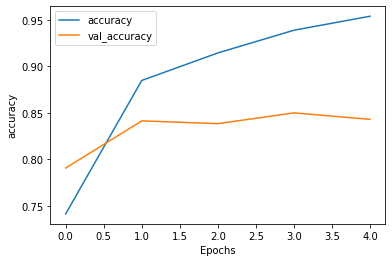

In [29]:
plot_graphs(history,'accuracy')

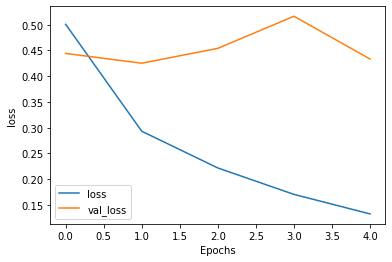

In [30]:
plot_graphs(history, 'loss')

## Model Evaluation

In [31]:
# evaluating the model
test_loss, test_acc = model.evaluate(test_padded, y_test)
print("Test accuracy: ", test_acc)

25000/25000 [==============================] - 20s 793us/sample - loss: 0.3915 - accuracy: 0.8492
Test accuracy:  0.84924


# Stack Additional LSTM Layer

- Creating a layer of LSTM memory units allows us to specify the number of memory units within the layer
- Each unit or cell within the layer has an internal cell state (denoted by "c") and outputs a hidden state (denoted by "h")
- Required if there are multiple layers of LSTM defined

`return_sequences`

- Return sequences of hidden state output for each input time steps
- Useful when sequence of hidden state outputs are required in predicting a sequential output

To use it `return_sequences = True`
 - return_state: Return last state alongwith the output

To use it `return_state = True`
- Both of them can be used at the same time

In [32]:
# creating modek
model = tf.keras.Sequential([
    # the Embedding layer is the key to text sentiment analysis
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [33]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 250, 128)          41472     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 246,913
Trainable params: 246,913
Non-trainable params: 0
________________________________________________

In [34]:
start = timeit.default_timer()

In [35]:
# takes about 10 mins to run
history = model.fit(train_padded, y_train, epochs=5, validation_split = 0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 132s 7ms/sample - loss: 0.6399 - accuracy: 0.6001 - val_loss: 0.4459 - val_accuracy: 0.7998
Epoch 2/5
20000/20000 [==============================] - 146s 7ms/sample - loss: 0.3651 - accuracy: 0.8511 - val_loss: 0.3473 - val_accuracy: 0.8482
Epoch 3/5
20000/20000 [==============================] - 136s 7ms/sample - loss: 0.2700 - accuracy: 0.8984 - val_loss: 0.3580 - val_accuracy: 0.8460
Epoch 4/5
20000/20000 [==============================] - 125s 6ms/sample - loss: 0.2248 - accuracy: 0.9204 - val_loss: 0.3424 - val_accuracy: 0.8600
Epoch 5/5
20000/20000 [==============================] - 127s 6ms/sample - loss: 0.1889 - accuracy: 0.9366 - val_loss: 0.3567 - val_accuracy: 0.8600


In [36]:
stop = timeit.default_timer()
execution_time = stop - start
exectime = time.strftime("%M:%S", time.gmtime(execution_time)) 
print("To train it took: {} mins".format(exectime))

To train it took: 18:20 mins


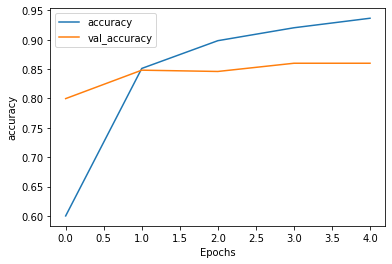

In [37]:
plot_graphs(history,'accuracy')

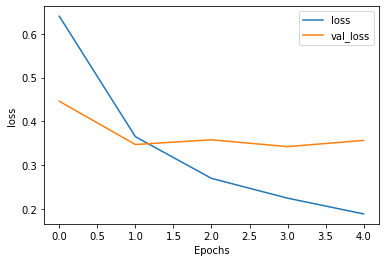

In [38]:
plot_graphs(history, 'loss')

## Evaluate the Model

In [39]:
# defining loss and accuracy
test_loss, test_acc = model.evaluate(test_padded, y_test)
print("Test accuracy: ", test_acc)

25000/25000 [==============================] - 40s 2ms/sample - loss: 0.3253 - accuracy: 0.8708
Test accuracy:  0.8708


In [40]:
# predicting on a positive sample
sample_text_to_predict = ["The movie was great. The animation and the graphics was excellent. I would recommend this movie."]
train_sequences = tokenizer.texts_to_sequences(sample_text_to_predict)
pos_padded = pad_sequences(train_sequences, 
                           maxlen=max_length, 
                           padding = "post", 
                           truncating="post")

# making prediction
prediction = model.predict(pos_padded)
print(prediction)

[[0.97631425]]


In [41]:
# predicting on a negative sample
sample_text_to_predict = ["The movie was horrible. The animation and the graphics were wrost. I would not recommend this movie."]
train_sequences = tokenizer.texts_to_sequences(sample_text_to_predict)
neg_padded = pad_sequences(train_sequences, 
                           maxlen=max_length, 
                           padding = "post", 
                           truncating="post")

#  making prediction
prediction = model.predict(neg_padded)
print(prediction)

[[0.56839305]]
